In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd 'drive/My Drive/Colab Notebooks'

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import random

# Load Data

In [ ]:
# training data
original_training_data_images = np.load('training_images.npz')['images']
training_data_labels_frame = pd.read_csv('training_trains_labels.csv')

# validation data
original_validation_data_images = np.load('validation_images.npz')['images']
validation_data_labels_frame = pd.read_csv('validation_trains_labels.csv')

# Observe Data

In [ ]:
print("Training Data:", original_training_data_images.shape)
print("Training Labels:", training_data_labels_frame.shape)
print("Testing Data:", original_validation_data_images.shape)
print("Testing Labels:", validation_data_labels_frame.shape)

Training Data: (1200, 20, 115, 3)
Training Labels: (1200, 5)
Testing Data: (800, 20, 115, 3)
Testing Labels: (800, 5)


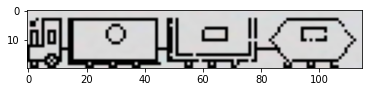

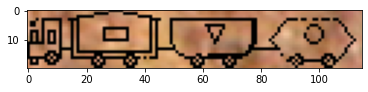

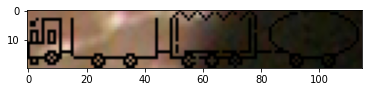

In [ ]:
# Visualize a few images from the training dataset
for i in range(3):
  plt.imshow(random.choice(original_training_data_images))
  plt.show()

# Preprocess Data

In [ ]:
data_labels = training_data_labels_frame.columns.values[1:]
data_labels

array(['Empty', 'HalfFull', 'Full', 'Overloaded'], dtype=object)

Get labels in the correct format

In [ ]:
y_train = training_data_labels_frame[data_labels].to_numpy()
y_test = validation_data_labels_frame[data_labels].to_numpy()

In [ ]:
print("Training Labels:", y_train.shape)
print("Validation Labels:", y_test.shape)

Training Labels: (1200, 4)
Validation Labels: (800, 4)


Preprocess the images

In [ ]:
# [:,:,0] since we only need one color channel
x_train = np.array([example[:,:,0] for example in original_training_data_images])
x_test = np.array([example[:,:,0] for example in original_validation_data_images])

# cnn needs a color channel
x_train = x_train.reshape(1200,20,115,1)
x_test = x_test.reshape(800,20,115,1)

# using float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize between 0 and 1
x_train /= 255.0
x_test /= 255.0

In [ ]:
print("Training Images:", x_train.shape)
print("Validation Images:", x_test.shape)

Training Images: (1200, 20, 115, 1)
Validation Images: (800, 20, 115, 1)


Observing our preprocessed data

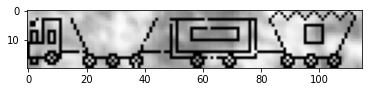

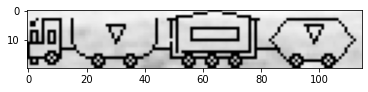

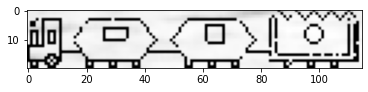

In [ ]:
for i in range(3):
    plt.imshow(x_train[i].reshape(20, 115), cmap='Greys_r')
    plt.show()

# Building Model

## Convolutional Base

In [245]:
model = keras.Sequential()
#model.add(layers.AveragePooling2D((2,2), 1, input_shape=(20, 115, 1)))
model.add(layers.Conv2D(32, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.Conv2D(64, (3,3), activation="relu"))

#model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

## Dense Layers

In [246]:
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

## Fitting the Model

In [248]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

hist = model.fit(x_train, y_train, epochs=10, batch_size=32,
                    validation_data=(x_test, y_test))
final_training_data = [(l,hist.history[l][-1]) for l in hist.history]

Epoch 1/10
38/38 [==============================] - 1s 13ms/step - loss: 1.3187 - accuracy: 0.3291 - val_loss: 0.7413 - val_accuracy: 0.7275
Epoch 2/10
38/38 [==============================] - 0s 9ms/step - loss: 0.5515 - accuracy: 0.7981 - val_loss: 0.3123 - val_accuracy: 0.8612
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 0.2779 - accuracy: 0.8740 - val_loss: 0.2721 - val_accuracy: 0.8800
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 0.1777 - accuracy: 0.9197 - val_loss: 0.1259 - val_accuracy: 0.9563
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 0.1356 - accuracy: 0.9450 - val_loss: 0.0977 - val_accuracy: 0.9650
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 0.1200 - accuracy: 0.9528 - val_loss: 0.1192 - val_accuracy: 0.9550
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0738 - accuracy: 0.9795 - val_loss: 0.0532 - val_accuracy: 0.9837
Epoch 8/10
38/38 [=

### Model Summary

In [249]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 18, 113, 32)       320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 9, 56, 32)         0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 7, 54, 64)         18496     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 5, 52, 64)         36928     
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 3, 50, 128)        73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 1, 25, 128)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 3200)             

## Observing Training Results

[('loss', 0.016459930688142776), ('accuracy', 0.9950000047683716), ('val_loss', 0.014006393030285835), ('val_accuracy', 0.9950000047683716)]


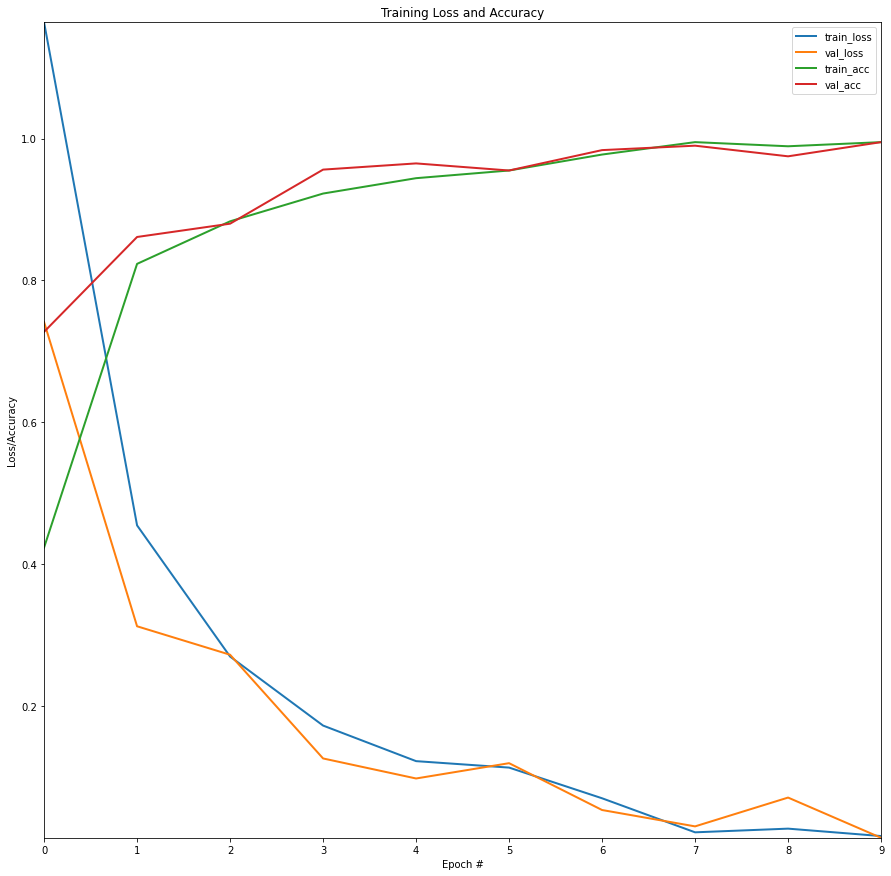

In [251]:
print(final_training_data)

plt.figure(figsize=(15, 15))
plt.plot(hist.history['loss'], label='train_loss', linewidth=2.0)
plt.plot(hist.history['val_loss'], label='val_loss', linewidth=2.0)
plt.plot(hist.history['accuracy'], label='train_acc', linewidth=2.0)
plt.plot(hist.history['val_accuracy'], label='val_acc', linewidth=2.0)
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.margins(x=0)
plt.margins(y=0)
plt.legend()
plt.show()

In [250]:
model.save_weights("./models/cnn-explainable-abstract-trains.h5")

# Hyperparameter Tuning

In [ ]:
%pip install -q -U keras-tuner

     |████████████████████████████████| 71kB 5.4MB/s 


In [ ]:
from kerastuner.tuners import RandomSearch

In [ ]:
# from the website

def build_model(hp):
    # Convolutional Base
    model = keras.Sequential()

    for i in range(hp.Int("Average Pooling Layer", min_value=0, max_value=1)):
        model.add(layers.AveragePooling2D((2,2), 1, input_shape=(20, 115, 1)))

    model.add(layers.Conv2D(hp.Choice("First Conv Layer", [32,64,128,256]), (3,3), activation="relu"))
    model.add(layers.MaxPooling2D((2,2)))

    for i in range(hp.Int("Conv Layers", min_value=0, max_value=3)):
        model.add(layers.Conv2D(hp.Choice(f"layers_{i}_filters", [32,64,128]), (3,3), activation="relu"))
    
    for i in range(hp.Int("Dropout Layer", min_value=0, max_value=1)):
        model.add(layers.Dropout(0.5))

    model.add(layers.Conv2D(hp.Choice("Last Conv Layer", [32,64,128,256]), (3,3), activation="relu"))
    model.add(layers.MaxPooling2D((2,2)))

    # Dense Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(hp.Choice("Dense Layer", [32,64,128,256]), activation='relu'))
    model.add(layers.Dense(4, activation='softmax'))

    # Loss function
    model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=100, 
    directory='./new_dir')

tuner.search(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

INFO:tensorflow:Reloading Oracle from existing project ./new_dir/untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./new_dir/untitled_project/tuner0.json
INFO:tensorflow:Oracle triggered exit


In [ ]:
best_model = tuner.get_best_models()[0]

In [253]:
tuner.results_summary(num_trials=1)

Results summary
Results in ./new_dir/untitled_project
Showing 1 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
Average Pooling Layer: 0
First Conv Layer: 32
Conv Layers: 2
Dropout Layer: 0
Last Conv Layer: 128
Dense Layer: 256
layers_0_filters: 64
layers_1_filters: 64
Score: 0.9962499737739563


# Evaluating Model

In [254]:
best_model.evaluate(x_test, y_test)

25/25 [==============================] - 0s 3ms/step - loss: 0.0163 - accuracy: 0.9962


[0.016298580914735794, 0.9962499737739563]

In [255]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 18, 113, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 56, 32)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 54, 64)         18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 52, 64)         36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 50, 128)        73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 25, 128)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0

# Save Model

In [ ]:
best_model.save('./models/cnn_explainable_abstract_trains_model')

INFO:tensorflow:Assets written to: ./models/cnn_explainable_abstract_trains_model/assets


# Loading Model

In [257]:
loaded_model = keras.models.load_model('./models/cnn_explainable_abstract_trains_model/')

In [235]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 18, 113, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 56, 32)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 54, 64)         18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 52, 64)         36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 50, 128)        73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 25, 128)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0

In [258]:
loaded_model.evaluate(x_test, y_test)

25/25 [==============================] - 0s 3ms/step - loss: 0.0163 - accuracy: 0.9962


[0.016298580914735794, 0.9962499737739563]